In [17]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np

|██████████| 100.0% ◆ elapsed 301.32ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:04<00:00, 12.38it/s]


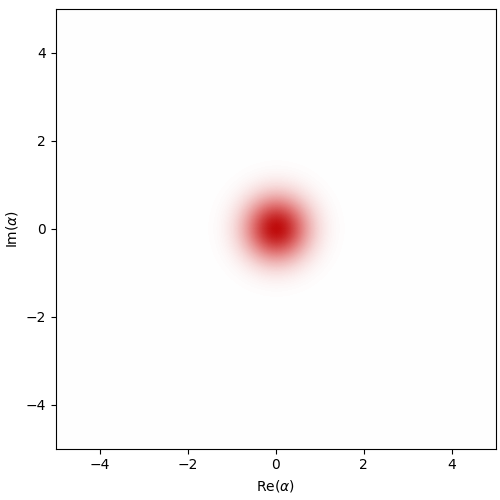

In [19]:
# 1.1 starts here
(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

kappa_b = 10
epsilon_d = -4
g2 = 1.0

H2ph = g2 * (adag @ adag) @ b + jnp.conj(g2) * (a @ a) @ bdag
Hd = jnp.conj(epsilon_d) * b + epsilon_d * bdag
H = H2ph + Hd

tsave = jnp.linspace(0, 4, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b], psi0, tsave)
rho = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho)

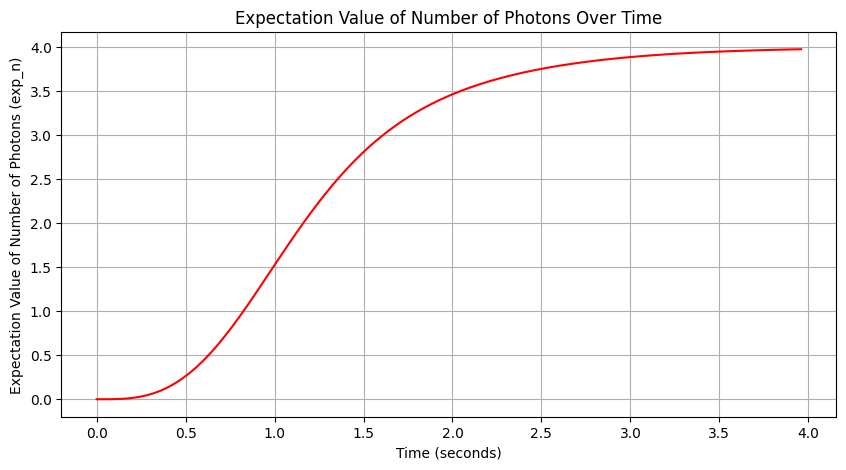

In [29]:
exp_n = dq.expect(dq.number(na), rho)
# print(exp_n)
#plot

# x axis is time with 4/100 second intervals
# y axis is going expectation value of number of photons (exp_n) at each point

# Define the time axis with 4/100 second intervals
time = np.arange(len(exp_n)) * (4 / 100)  # 4/100 seconds per interval
# Creating the plot with proper labels
plt.figure(figsize=(10, 5))
plt.plot(time, exp_n, marker='', linestyle='-', color='r')
plt.title("Expectation Value of Number of Photons Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Expectation Value of Number of Photons (exp_n)")
plt.grid(True)

# Show the plot
plt.show()


|██████████| 100.0% ◆ elapsed 448.50ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:03<00:00, 13.10it/s]


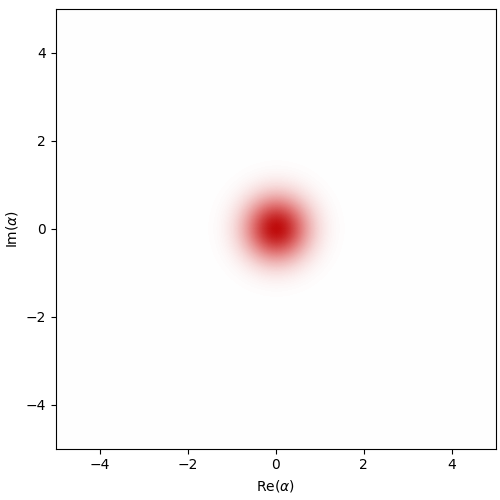

In [9]:
# 1.2 starts here
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -epsilon_d / jnp.conj(g2)
tsave = jnp.linspace(0, 4, 100)

res = dq.mesolve(H, [jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(*a.dims))], psi0, tsave)
rhoa = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rhoa)

|██████████| 100.0% ◆ elapsed 1.70s ◆ remaining 0.00ms     
100%|██████████| 50/50 [00:05<00:00,  9.25it/s]


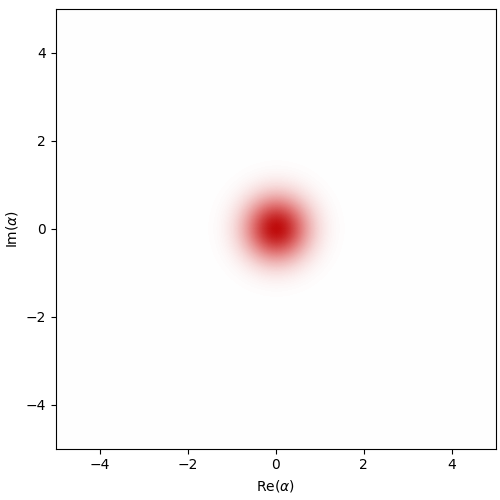

In [11]:
kappa_b = 2
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -epsilon_d / jnp.conj(g2)

res = dq.mesolve(H, [jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(*a.dims))], psi0, tsave)
dq.plot.wigner_gif(dq.ptrace(res.states, 0))

In [14]:
o = dq.destroy(1)
odag = o.dag()
psi0 = dq.coherent()

TypeError: coherent() missing 2 required positional arguments: 'dim' and 'alpha'